In [1]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [24]:
X,Y = make_circles(n_samples=500,noise=0.02)

In [25]:
print(X.shape,Y.shape)

(500, 2) (500,)


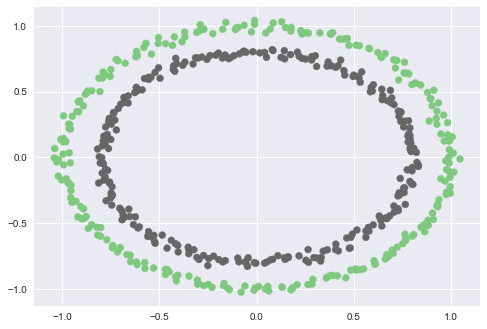

In [26]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='Accent')
plt.show()

In [27]:
def phi(X):
    # Non-Linear Transformation
    x1 = X[:,0]
    x2 = X[:,1]
    x3 = x1**2 +x2**2
    X_ = np.zeros((X.shape[0],3))
    X_[:,:-1]=X
    X_[:,-1]=x3
    return X_

In [28]:
X_ = phi(X)

In [29]:
print(X[:3,:])
print(X_[:3,:])

[[ 0.48157544 -0.6905861 ]
 [-0.30323732 -0.96619146]
 [ 0.45531673  0.90176458]]
[[ 0.48157544 -0.6905861   0.70882407]
 [-0.30323732 -0.96619146  1.02547882]
 [ 0.45531673  0.90176458  1.02049268]]


In [43]:
def plot3D(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True,cmap='Accent')
    if(show==True):
        plt.show()
    return ax

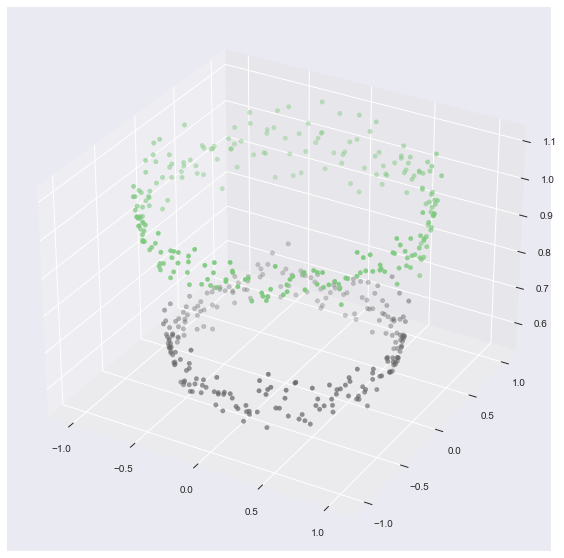

<Axes3DSubplot:>

In [31]:
plot3D(X_)

## Logistic Classifier

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [33]:
lr = LogisticRegression()
acc = cross_val_score(lr,X,Y,cv=5).mean()
print(acc)

0.43600000000000005


Not a good accuracy

In [34]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print(acc)

1.0


## Visualize Decesion Surface

In [35]:
lr.fit(X_,Y)

LogisticRegression()

In [40]:
w = lr.coef_
w

array([[  0.02443689,  -0.01561897, -10.89815942]])

In [39]:
b =lr.intercept_
b

array([8.94065042])

In [38]:
x,y = np.meshgrid(range(-2,2),range(-2,2))
print(x)
print(y)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [42]:
z = -(w[0,0]*x+w[0,1]**y+b)/w[0,2]
print(z)

[[376.94952415 376.95176645 376.95400874 376.95625104]
 [ -5.05892206  -5.05667977  -5.05443747  -5.05219518]
 [  0.90765571   0.90989801   0.9121403    0.9143826 ]
 [  0.81446392   0.81670622   0.81894851   0.82119081]]


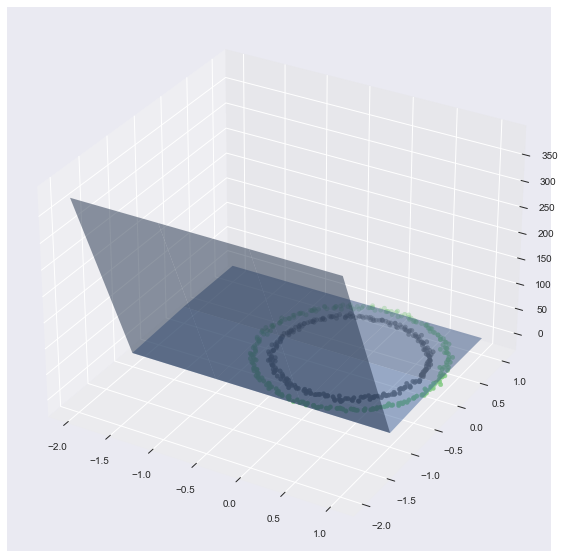

In [51]:
axis = plot3D(X_,show=False)
axis.plot_surface(x,y,z,alpha=0.5)
plt.show()

In [50]:
axis.plot_surface?